Weather Trends based on Latitude:
    1. The farther a city's latitude is from the equator, the lower the temperature of that city is. 
    2. The latitude of a city and the percent cloudiness of that city are not correlated.
    3. The cities with the highest wind speeds are some of the cities that are farthest from the equator. 

In [1]:
# Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from citipy import citipy 
import datetime as dt 

In [2]:
# Create random list of coordinates for latitude and longitude
latitudes = []
longitudes = []

for lat in np.random.randint(
    -90,90,2000):
    latitudes.append(lat)

for lng in np.random.randint(-180,180,2000):
    longitudes.append(lng)

coordinates = zip(latitudes, longitudes)

In [3]:
# Find the nearest city for all latitudes and longitudes using citipy
cities = []
countries = []

for lat, lng in coordinates:
    nearest_city = citipy.nearest_city(lat,lng)
    cityName = nearest_city.city_name
    cities.append(cityName)
    countries.append(nearest_city.country_code)
    
# Create Dataframe for the City Names and Country Codes
cities_df = pd.DataFrame({'City Name': cities,
                          'Country Code': countries})

# Add additional empty columns to Dataframe
cities_df['Latitude'] = ''
cities_df['Longitude'] = ''
cities_df['Temperature (F)'] = ''
cities_df['Humidity (%)'] = ''
cities_df['Cloudiness (%)'] = ''
cities_df['Wind Speed (mph)'] = ''

cities_df = cities_df.drop_duplicates(subset=['City Name'])
cities_df.head()

,City Name,Country Code,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,upernavik,gl,,,,,,
1,khatanga,ru,,,,,,
2,cape town,za,,,,,,
3,ampanihy,mg,,,,,,
4,carnduff,ca,,,,,,


In [4]:
# Set API key and base url
api_key = "25bc90a1196e6f153eece0bc0b0fc9eb"
base_url = "http://api.openweathermap.org/data/2.5/weather?"

# Loop through all rows and fill in column values for cities_df 
for index, row in cities_df.iterrows():
    c_name = row['City Name']
    ctry_code = row['Country Code']
    location = "{},{}".format(c_name,ctry_code)
   
    params = {'q': location, 'units': 'imperial', 'appid': api_key}
    
    weather_response = requests.get(base_url, params=params)
    weather_json = weather_response.json()
    
    print("Retrieving City #" + str(index+1) + ": " + row['City Name'] + ", " + row['Country Code'])
    print(weather_response.url) 
    
    try:
        latitude = weather_json['coord']['lat']
        longitude = weather_json['coord']['lon']
        temp = weather_json['main']['temp']
        humid = weather_json['main']['humidity']
        cloud = weather_json['clouds']['all']
        wind = weather_json['wind']['speed']
    
        cities_df.set_value(index,'Latitude', latitude)
        cities_df.set_value(index,'Longitude', longitude)
        cities_df.set_value(index,'Temperature (F)', temp)
        cities_df.set_value(index,'Humidity (%)', humid)
        cities_df.set_value(index,'Cloudiness (%)', cloud)
        cities_df.set_value(index,'Wind Speed (mph)', wind)
        
    except KeyError:
        cities_df.set_value(index,'Latitude',np.nan)
        cities_df.set_value(index,'Longitude',np.nan)
        cities_df.set_value(index,'Temperature (F)',np.nan)
        cities_df.set_value(index,'Humidity (%)',np.nan)
        cities_df.set_value(index,'Cloudiness (%)',np.nan)
        cities_df.set_value(index,'Wind Speed (mph)',np.nan)
        
        print(f"Error. Missing weather information for {c_name}, {ctry_code}. Skipped")
        continue

Retrieving City #1: upernavik, gl
http://api.openweathermap.org/data/2.5/weather?q=upernavik%2Cgl&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrieving City #2: khatanga, ru
http://api.openweathermap.org/data/2.5/weather?q=khatanga%2Cru&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrieving City #3: cape town, za
http://api.openweathermap.org/data/2.5/weather?q=cape+town%2Cza&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrieving City #4: ampanihy, mg
http://api.openweathermap.org/data/2.5/weather?q=ampanihy%2Cmg&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrieving City #5: carnduff, ca
http://api.openweathermap.org/data/2.5/weather?q=carnduff%2Cca&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrieving City #6: vaini, to
http://api.openweathermap.org/data/2.5/weather?q=vaini%2Cto&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrieving City #7: vaitupu, wf
http://api.openweathermap.org/data/2.5/weather?q=vaitupu%2Cwf&units=im

Retrieving City #63: nouadhibou, mr
http://api.openweathermap.org/data/2.5/weather?q=nouadhibou%2Cmr&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrieving City #64: tumannyy, ru
http://api.openweathermap.org/data/2.5/weather?q=tumannyy%2Cru&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Error. Missing weather information for tumannyy, ru. Skipped
Retrieving City #66: bluff, nz
http://api.openweathermap.org/data/2.5/weather?q=bluff%2Cnz&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrieving City #67: luganville, vu
http://api.openweathermap.org/data/2.5/weather?q=luganville%2Cvu&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrieving City #68: ushuaia, ar
http://api.openweathermap.org/data/2.5/weather?q=ushuaia%2Car&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrieving City #69: linao, ph
http://api.openweathermap.org/data/2.5/weather?q=linao%2Cph&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrieving City #70: kartaly, ru
http:/

Retrieving City #139: luderitz, na
http://api.openweathermap.org/data/2.5/weather?q=luderitz%2Cna&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrieving City #141: dombarovskiy, ru
http://api.openweathermap.org/data/2.5/weather?q=dombarovskiy%2Cru&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrieving City #142: krasnoyarsk, ru
http://api.openweathermap.org/data/2.5/weather?q=krasnoyarsk%2Cru&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrieving City #144: newport, us
http://api.openweathermap.org/data/2.5/weather?q=newport%2Cus&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrieving City #146: kruisfontein, za
http://api.openweathermap.org/data/2.5/weather?q=kruisfontein%2Cza&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrieving City #147: alice springs, au
http://api.openweathermap.org/data/2.5/weather?q=alice+springs%2Cau&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrieving City #148: mar del plata, ar
http://api.openwea

Retrieving City #214: masallatah, ly
http://api.openweathermap.org/data/2.5/weather?q=masallatah%2Cly&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrieving City #220: gat, ly
http://api.openweathermap.org/data/2.5/weather?q=gat%2Cly&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Error. Missing weather information for gat, ly. Skipped
Retrieving City #223: cidreira, br
http://api.openweathermap.org/data/2.5/weather?q=cidreira%2Cbr&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrieving City #225: walvis bay, na
http://api.openweathermap.org/data/2.5/weather?q=walvis+bay%2Cna&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrieving City #226: los llanos de aridane, es
http://api.openweathermap.org/data/2.5/weather?q=los+llanos+de+aridane%2Ces&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrieving City #229: sosva, ru
http://api.openweathermap.org/data/2.5/weather?q=sosva%2Cru&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrieving Cit

Retrieving City #356: sitka, us
http://api.openweathermap.org/data/2.5/weather?q=sitka%2Cus&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrieving City #357: kuche, cn
http://api.openweathermap.org/data/2.5/weather?q=kuche%2Ccn&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Error. Missing weather information for kuche, cn. Skipped
Retrieving City #359: san quintin, mx
http://api.openweathermap.org/data/2.5/weather?q=san+quintin%2Cmx&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Error. Missing weather information for san quintin, mx. Skipped
Retrieving City #362: calbuco, cl
http://api.openweathermap.org/data/2.5/weather?q=calbuco%2Ccl&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrieving City #363: samarai, pg
http://api.openweathermap.org/data/2.5/weather?q=samarai%2Cpg&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrieving City #364: palmer, us
http://api.openweathermap.org/data/2.5/weather?q=palmer%2Cus&units=imperial&appid=25bc90a1196e6

Retrieving City #476: cayenne, gf
http://api.openweathermap.org/data/2.5/weather?q=cayenne%2Cgf&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrieving City #477: kidal, ml
http://api.openweathermap.org/data/2.5/weather?q=kidal%2Cml&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrieving City #478: stykkisholmur, is
http://api.openweathermap.org/data/2.5/weather?q=stykkisholmur%2Cis&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrieving City #479: ilinskoye-khovanskoye, ru
http://api.openweathermap.org/data/2.5/weather?q=ilinskoye-khovanskoye%2Cru&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrieving City #484: imbituba, br
http://api.openweathermap.org/data/2.5/weather?q=imbituba%2Cbr&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrieving City #486: claveria, ph
http://api.openweathermap.org/data/2.5/weather?q=claveria%2Cph&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrieving City #487: porto novo, cv
http://api.openweatherm

Retrieving City #588: vardo, no
http://api.openweathermap.org/data/2.5/weather?q=vardo%2Cno&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrieving City #589: winslow, us
http://api.openweathermap.org/data/2.5/weather?q=winslow%2Cus&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrieving City #590: nizwa, om
http://api.openweathermap.org/data/2.5/weather?q=nizwa%2Com&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrieving City #592: nemuro, jp
http://api.openweathermap.org/data/2.5/weather?q=nemuro%2Cjp&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrieving City #593: castanheira de pera, pt
http://api.openweathermap.org/data/2.5/weather?q=castanheira+de+pera%2Cpt&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrieving City #594: salym, ru
http://api.openweathermap.org/data/2.5/weather?q=salym%2Cru&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrieving City #595: chingirlau, kz
http://api.openweathermap.org/data/2.5/weather?q=chin

Retrieving City #727: playas, ec
http://api.openweathermap.org/data/2.5/weather?q=playas%2Cec&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrieving City #732: husavik, is
http://api.openweathermap.org/data/2.5/weather?q=husavik%2Cis&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrieving City #736: springbok, za
http://api.openweathermap.org/data/2.5/weather?q=springbok%2Cza&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrieving City #738: pocone, br
http://api.openweathermap.org/data/2.5/weather?q=pocone%2Cbr&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrieving City #739: mayo, ca
http://api.openweathermap.org/data/2.5/weather?q=mayo%2Cca&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrieving City #742: thinadhoo, mv
http://api.openweathermap.org/data/2.5/weather?q=thinadhoo%2Cmv&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrieving City #743: mkushi, zm
http://api.openweathermap.org/data/2.5/weather?q=mkushi%2Czm&units=im

Retrieving City #871: jumla, np
http://api.openweathermap.org/data/2.5/weather?q=jumla%2Cnp&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrieving City #873: marrakesh, ma
http://api.openweathermap.org/data/2.5/weather?q=marrakesh%2Cma&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrieving City #875: hofn, is
http://api.openweathermap.org/data/2.5/weather?q=hofn%2Cis&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrieving City #878: richards bay, za
http://api.openweathermap.org/data/2.5/weather?q=richards+bay%2Cza&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrieving City #881: puerto madero, mx
http://api.openweathermap.org/data/2.5/weather?q=puerto+madero%2Cmx&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrieving City #884: yangjiang, cn
http://api.openweathermap.org/data/2.5/weather?q=yangjiang%2Ccn&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrieving City #895: galiwinku, au
http://api.openweathermap.org/data/2.5/weath

Retrieving City #1023: goianesia, br
http://api.openweathermap.org/data/2.5/weather?q=goianesia%2Cbr&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrieving City #1032: tura, ru
http://api.openweathermap.org/data/2.5/weather?q=tura%2Cru&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrieving City #1036: yerbogachen, ru
http://api.openweathermap.org/data/2.5/weather?q=yerbogachen%2Cru&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrieving City #1039: sola, vu
http://api.openweathermap.org/data/2.5/weather?q=sola%2Cvu&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrieving City #1048: socorro, us
http://api.openweathermap.org/data/2.5/weather?q=socorro%2Cus&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrieving City #1052: innisfail, au
http://api.openweathermap.org/data/2.5/weather?q=innisfail%2Cau&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrieving City #1054: yulin, cn
http://api.openweathermap.org/data/2.5/weather?q=yulin%2C

Retrieving City #1178: tocopilla, cl
http://api.openweathermap.org/data/2.5/weather?q=tocopilla%2Ccl&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrieving City #1181: nederland, us
http://api.openweathermap.org/data/2.5/weather?q=nederland%2Cus&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrieving City #1184: khonuu, ru
http://api.openweathermap.org/data/2.5/weather?q=khonuu%2Cru&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Error. Missing weather information for khonuu, ru. Skipped
Retrieving City #1185: moron, mn
http://api.openweathermap.org/data/2.5/weather?q=moron%2Cmn&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrieving City #1188: jiexiu, cn
http://api.openweathermap.org/data/2.5/weather?q=jiexiu%2Ccn&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrieving City #1190: barela, in
http://api.openweathermap.org/data/2.5/weather?q=barela%2Cin&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrieving City #1194: sokoni, tz
htt

Retrieving City #1333: bac lieu, vn
http://api.openweathermap.org/data/2.5/weather?q=bac+lieu%2Cvn&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Error. Missing weather information for bac lieu, vn. Skipped
Retrieving City #1337: balkhash, kz
http://api.openweathermap.org/data/2.5/weather?q=balkhash%2Ckz&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrieving City #1339: nicoya, cr
http://api.openweathermap.org/data/2.5/weather?q=nicoya%2Ccr&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrieving City #1342: aden, ye
http://api.openweathermap.org/data/2.5/weather?q=aden%2Cye&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrieving City #1344: bubaque, gw
http://api.openweathermap.org/data/2.5/weather?q=bubaque%2Cgw&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrieving City #1345: sao joao da barra, br
http://api.openweathermap.org/data/2.5/weather?q=sao+joao+da+barra%2Cbr&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrieving City #

Retrieving City #1503: dakoro, ne
http://api.openweathermap.org/data/2.5/weather?q=dakoro%2Cne&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrieving City #1504: francisco beltrao, br
http://api.openweathermap.org/data/2.5/weather?q=francisco+beltrao%2Cbr&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrieving City #1507: port-cartier, ca
http://api.openweathermap.org/data/2.5/weather?q=port-cartier%2Cca&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrieving City #1508: sur, om
http://api.openweathermap.org/data/2.5/weather?q=sur%2Com&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrieving City #1513: chitipa, mw
http://api.openweathermap.org/data/2.5/weather?q=chitipa%2Cmw&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrieving City #1514: okahandja, na
http://api.openweathermap.org/data/2.5/weather?q=okahandja%2Cna&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrieving City #1516: tianpeng, cn
http://api.openweathermap.org/data

Retrieving City #1687: vera cruz, br
http://api.openweathermap.org/data/2.5/weather?q=vera+cruz%2Cbr&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrieving City #1695: la palma, pa
http://api.openweathermap.org/data/2.5/weather?q=la+palma%2Cpa&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrieving City #1699: mahadday weyne, so
http://api.openweathermap.org/data/2.5/weather?q=mahadday+weyne%2Cso&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Error. Missing weather information for mahadday weyne, so. Skipped
Retrieving City #1700: lorengau, pg
http://api.openweathermap.org/data/2.5/weather?q=lorengau%2Cpg&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrieving City #1702: benghazi, ly
http://api.openweathermap.org/data/2.5/weather?q=benghazi%2Cly&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrieving City #1707: takapau, nz
http://api.openweathermap.org/data/2.5/weather?q=takapau%2Cnz&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Ret

Retrieving City #1852: garissa, ke
http://api.openweathermap.org/data/2.5/weather?q=garissa%2Cke&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrieving City #1853: jinan, cn
http://api.openweathermap.org/data/2.5/weather?q=jinan%2Ccn&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrieving City #1857: roald, no
http://api.openweathermap.org/data/2.5/weather?q=roald%2Cno&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrieving City #1865: farah, af
http://api.openweathermap.org/data/2.5/weather?q=farah%2Caf&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrieving City #1867: horsham, au
http://api.openweathermap.org/data/2.5/weather?q=horsham%2Cau&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrieving City #1873: nangomba, tz
http://api.openweathermap.org/data/2.5/weather?q=nangomba%2Ctz&units=imperial&appid=25bc90a1196e6f153eece0bc0b0fc9eb
Retrieving City #1878: iquitos, pe
http://api.openweathermap.org/data/2.5/weather?q=iquitos%2Cpe&units=i

In [5]:
# Changing strings to floats
columns = ['Latitude', 'Temperature (F)', 'Humidity (%)', 'Cloudiness (%)', 'Wind Speed (mph)']
for column in columns:
    cities_df[column] = pd.to_numeric(cities_df[column], errors='coerce')
    
# Dropping NaN values
cities_df.dropna(inplace=True)

cities_df.head()

,City Name,Country Code,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,upernavik,gl,72.79,-56.15,12.90,87.0,44.0,3.69
1,khatanga,ru,71.98,102.47,-5.19,68.0,80.0,7.38
2,cape town,za,-33.93,18.42,77.00,50.0,20.0,14.99
3,ampanihy,mg,-24.69,44.75,92.28,60.0,0.0,4.03
4,carnduff,ca,49.17,-101.8,3.90,51.0,0.0,2.91


In [6]:
# Export Dataframe to CSV
cities_df.to_csv("weather_information.csv")

# Get today's date
today = dt.datetime.today().strftime("%m/%d/%y")

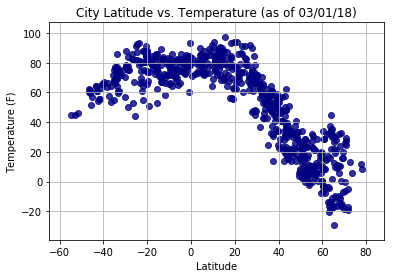

In [7]:
# Axes values
x_axis = cities_df['Latitude']
y_axis = cities_df['Temperature (F)']

sns.regplot(x_axis, y_axis, fit_reg=False, color='navy')

plt.title(f"City Latitude vs. Temperature (as of {today})")
plt.xlabel("Latitude")
plt.xlim(min(x_axis)-10,max(x_axis)+10)
plt.ylabel("Temperature (F)")
plt.ylim(min(y_axis)-10,max(y_axis)+10)
plt.grid()
plt.savefig("LatitudeVsTemperature.png")
plt.show()

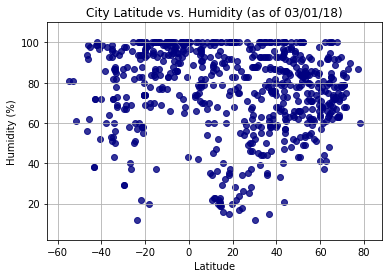

In [8]:
# Axes values
x_axis = cities_df['Latitude']
y_axis = cities_df['Humidity (%)']

sns.regplot(x_axis, y_axis, fit_reg=False, color='navy')

plt.title(f"City Latitude vs. Humidity (as of {today})")
plt.xlabel("Latitude")
plt.xlim(min(x_axis)-10,max(x_axis)+10)
plt.ylabel("Humidity (%)")
plt.ylim(min(y_axis)-10,max(y_axis)+10)
plt.grid()
plt.savefig("LatitudeVsHumidity.png")
plt.show()

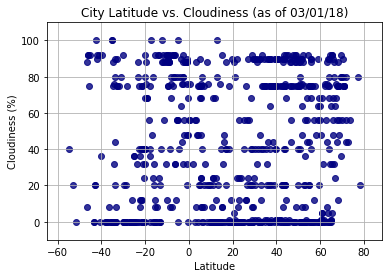

In [9]:
# Axes values
x_axis = cities_df['Latitude']
y_axis = cities_df['Cloudiness (%)']

sns.regplot(x_axis, y_axis, fit_reg=False, color='navy')

plt.title(f"City Latitude vs. Cloudiness (as of {today})")
plt.xlabel("Latitude")
plt.xlim(min(x_axis)-10,max(x_axis)+10)
plt.ylabel("Cloudiness (%)")
plt.ylim(min(y_axis)-10,max(y_axis)+10)
plt.grid()
plt.savefig("LatitudeVsCloudiness.png")
plt.show()

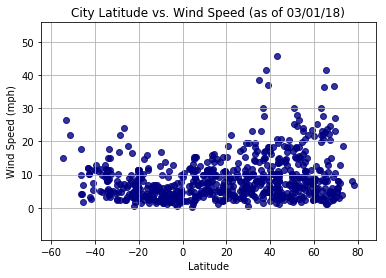

In [10]:
# Axes values
x_axis = cities_df['Latitude']
y_axis = cities_df['Wind Speed (mph)']

sns.regplot(x_axis, y_axis, fit_reg=False, color='navy')

plt.title(f"City Latitude vs. Wind Speed (as of {today})")
plt.xlabel("Latitude")
plt.xlim(min(x_axis)-10,max(x_axis)+10)
plt.ylabel("Wind Speed (mph)")
plt.ylim(min(y_axis)-10,max(y_axis)+10)
plt.grid()
plt.savefig("LatitudeVsWind.png")
plt.show()